In [20]:
using Plots
y  = 3600*24*365.25
My = 1e6* y

3.15576e13

### Heating a system

Let's recall the first law: $\frac{\mathrm{d}u}{\mathrm{d}t} = \dot{q}$

We now assume that a material with an initial $T$ = 1000 C and materials properties $\rho$ = 3000 kg/m3, c = 1000 J/kg/K

The system is heated at a constant heating rate $\dot{q}$ = 1e-4 J/m3/s

You should model both temperature and internal energy increasing with time. 

1. Compute the initial internal energy in units J/m3

2. In the time loop, update u

3. Calculate T


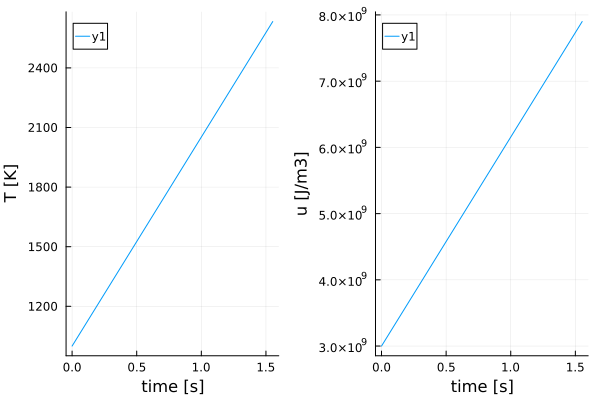

In [21]:
# Physical parameters
q̇     = 1e-4  
rho   = 3000.0
c     = 1000.0
T_ini = 1000.0

# Numerical parameters
Δt  = 1e12
nt  = 50
t   = 0.0

# Initialise the variables
T      = T_ini
u      = rho*c*T

# Create arrays to store the evolution
T_vec = T*ones(nt)
u_vec = u*ones(nt)
t_vec = t*ones(nt)

# Loop through time to evolve the model
for it=2:nt

    t = t + Δt

    u = u + Δt*q̇

    T = u /rho/c
    
    T_vec[it] = T
    u_vec[it] = u
    t_vec[it] = t

end

# Visualise
p1 = plot(t_vec./My, [T_vec], xlabel="time [s]", ylabel="T [K]")
p2 = plot(t_vec./My, [u_vec], xlabel="time [s]", ylabel="u [J/m3]")
plot(p1, p2)

### Two systems 

Two systems of different initial temperature evolve independantly.

System 1 receives a heat input rate of +1e-4 J/m3/s.

System 2 receives a heat input rate of -1e-4 J/m3/s.

Both sytem temperature should evolve, independantly.

1. Compute the initial internal energy for each system

2. In the time loop, update u  for each system

3. Calculate T for each system

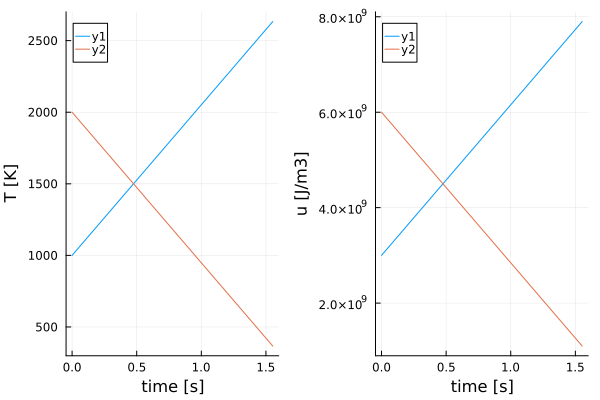

In [22]:
# Physical parameters
q̇      = 1e-4 
ρ      = 3000.0
c      = 1000.0
T1_ini = 1000.0
T2_ini = 2000.0

# Numerical parameters
Δt  = 1e12
nt  = 50
t   = 0.0

# Initialise the variables
T1  = T1_ini
T2  = T2_ini
u1  = ρ*c*T1
u2  = ρ*c*T2

# Create arrays to store the evolution
T1_vec = T1*ones(nt)
T2_vec = T2*ones(nt)
u1_vec = u1*ones(nt)
u2_vec = u2*ones(nt)
t_vec  = t*ones(nt)

# Loop through time to evolve the model
for it=2:nt

    t = t + Δt

    u1 = u1 + Δt*q̇
    u2 = u2 - Δt*q̇

    T1  = u1/ρ/c
    T2  = u2/ρ/c
    
    T1_vec[it] = T1
    T2_vec[it] = T2
    u1_vec[it] = u1
    u2_vec[it] = u2
    t_vec[it]  = t

end

# Visualise
p1 = plot(t_vec./My, [T1_vec T2_vec], xlabel="time [s]", ylabel="T [K]")
p2 = plot(t_vec./My, [u1_vec u2_vec], xlabel="time [s]", ylabel="u [J/m3]")
plot(p1, p2)

### Two coupled systems 

Two systems of different initial temperature evolve in a coupled way.

System 1 receives the heat that leaves system 2.

The heating rate is expressed as $\dot{q} = k * (T_1 - T_2)$ where k is the thermal conductance.

Both sytem temperature should evolve together, until thermal equilibrium.

1. Compute the initial internal energy for each system

2. In the time loop, update u  for each system

3. Calculate T for each system

4. Conservation of energy should hold. The net energy production for both system should be zero. The sum of energies of both system should be constant. Plot the sum of internal energies through time.

5. To check the code is correctly implemented, one can use an existing analytical model for this problem. Try plotting it.

The equilibrium temperature is $T^\text{eq} = \frac{c_1  T_1^\text{ini} + c_2 T_2^\text{ini}} {c_1 + c_2}$

The initial temperature difference is $\Delta T^\text{ini} = T_1^\text{ini} - T_2^\text{ini}$

For system 1: $T(t) = T^\text{eq} + \frac{c_2}{c_1+c_2} \Delta T^\text{ini}  \exp(-\frac{t}{\tau})$

For system 2: $T(t) = T^\text{eq} - \frac{c_1}{c_1+c_2} \Delta T^\text{ini}  \exp(-\frac{t}{\tau})$

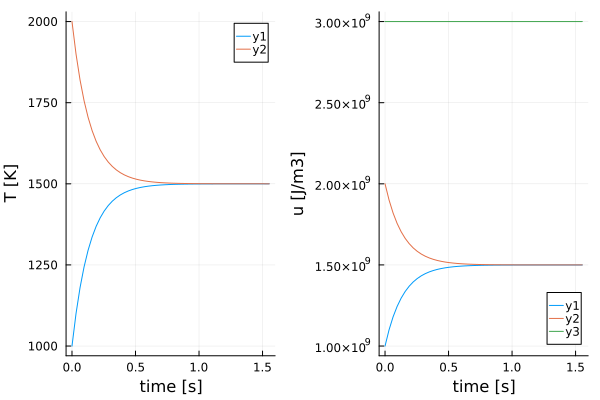

In [ ]:
# Physical parameters
ρ      = 1000.0
c1     = 1000.0
c2     = 1000.0
T1_ini = 1000.0
T2_ini = 2000.0
k      = 1e-7

# Numerical parameters
Δt  = 1e12
nt  = 50
t   = 0.0

# Initialise the variables
T1  = T1_ini
T2  = T2_ini
u1  = ρ*c1*T1
u2  = ρ*c2*T2

# Create arrays to store the evolution
T1_vec = T1*ones(nt)
T2_vec = T2*ones(nt)
u1_vec = u1*ones(nt)
u2_vec = u2*ones(nt)
t_vec  =  t*ones(nt)

# Loop through time to evolve the model
for it=2:nt

    t = t + Δt

    q̇  = k * (T1 - T2) 

    u1 = u1 - Δt*q̇
    u2 = u2 + Δt*q̇ 

    T1  = u1/ρ/c1
    T2  = u2/ρ/c2

    T1_vec[it] = T1
    T2_vec[it] = T2
    u1_vec[it] = u1
    u2_vec[it] = u2
    t_vec[it]  = t
end

# Equilibrium temperature
Teq = (c1 * T1_ini + c2 * T2_ini) / (c1 + c2)
ΔT0 = T1_ini - T2_ini
τ   = (c1 * c2) / (k / ρ * (c1 + c2))

# # Define T1(t) and T2(t) analytically
# T1_analytical = ?????????????????
# T2_analytical = ?????????????????

# Visualise
p1 = plot()
p1 = plot!(t_vec./My, [T1_vec T2_vec], xlabel="time [s]", ylabel="T [K]")
# p1 = scatter!(t_vec./My, [T1_analytical T2_analytical])
p2 = plot(t_vec./My, [u1_vec u2_vec u1_vec.+u2_vec], xlabel="time [s]", ylabel="u [J/m3]")
plot(p1, p2)
